**Thuật toán CNN cho phân loại ảnh ung thư da (SkinCancer)**

In [1]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load Images and Prepare Labels  
image_folder = '/kaggle/input/skindata/CancerSkin'  # Update with your image folder path  
image_files = os.listdir(image_folder)  
labels = [file.split('_')[0] for file in image_files]  # Assume label is part of the filename  
labels = ['Normal', 'Cancer']
labels
# Step 3: Train-Test Split  
#X_train_paths, X_test_paths, y_train, y_test = train_test_split(image_paths, labels, test_size=0.2, random_state=42)  
# Example directory structure  
base_dir = '/kaggle/input/skindata/CancerSkin'  # Change this to your dataset path  
categories = ['Normal', 'Cancer'] # Define your categories  

image_paths = []  
labels = []  

# Collect all paths and corresponding labels  
for category in categories:  
    category_path = os.path.join(base_dir, category)  
    for filename in os.listdir(category_path):  
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Check for image files  
            image_paths.append(os.path.join(category_path, filename))  
            labels.append(category)  

In [3]:
# Create train-test split  
X_train, X_test, y_train, y_test = train_test_split(  
    image_paths,  
    labels,  
    test_size=0.2,  # 20% of data will be used as test set  
    random_state=42,  # For reproducibility 
) 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Encoding train labels
y_test = label_encoder.transform(y_test)  # Encoding test labels


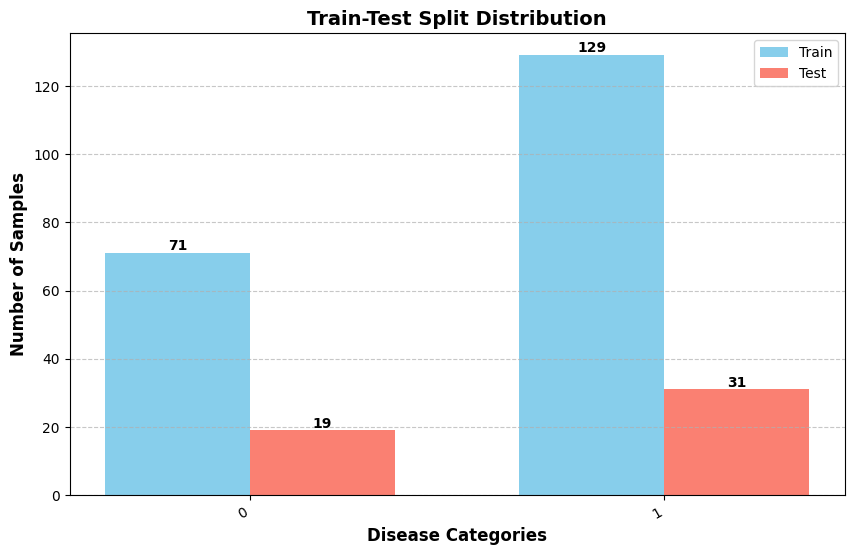

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define categories (class labels)
categories = sorted(set(y_train) | set(y_test))  # Get unique class labels

# Count occurrences of each class
train_counts = [np.count_nonzero(y_train == cls) for cls in categories]
test_counts = [np.count_nonzero(y_test == cls) for cls in categories]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(categories))

# Create bars
train_bars = plt.bar(index, train_counts, bar_width, label='Train', color='skyblue')
test_bars = plt.bar(index + bar_width, test_counts, bar_width, label='Test', color='salmon')

# Add numbers on top of bars
for bars in [train_bars, test_bars]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Formatting the plot
plt.xlabel('Disease Categories', fontsize=12, fontweight='bold')  # ✅ Label for x-axis
plt.ylabel('Number of Samples', fontsize=12, fontweight='bold')
plt.title('Train-Test Split Distribution', fontsize=14, fontweight='bold')
plt.xticks(index + bar_width / 2, categories, rotation=30, ha="right", fontsize=10)  # ✅ Class names added
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for better readability

plt.show()


**Thực hiện chương trình luấn luyện và dự đoán (phân loại cho tập Test)**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.6612 - loss: 0.7632 - val_accuracy: 0.6200 - val_loss: 0.6418
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.6333 - loss: 0.6138 - val_accuracy: 0.6200 - val_loss: 0.5749
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.8210 - loss: 0.3969 - val_accuracy: 0.4800 - val_loss: 0.8418
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.7021 - loss: 0.5282 - val_accuracy: 0.7600 - val_loss: 0.3889
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.8127 - loss: 0.4124 - val_accuracy: 0.9000 - val_loss: 0.2644
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.9162 - loss: 0.2082 - val_accuracy: 0.9000 - val_loss: 0.3466
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.9117 - loss: 0.2713 - val_accuracy: 0.9200 - val_loss: 0.2938
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.9003 - loss: 0.2786 - val_accuracy: 0.9400 - val_loss: 

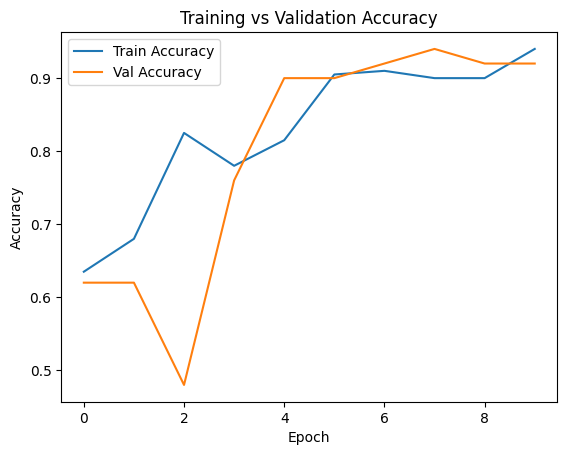

In [5]:


# --- Step 1: Load and preprocess images from file paths ---
def load_images(image_paths, target_size=(64, 64)):
    images = []
    for path in image_paths:
        img = cv2.imread(path)
        img = cv2.resize(img, target_size)
        img = img / 255.0  # Normalize to [0,1]
        images.append(img)
    return np.array(images)

# Create train-test split  
X_train, X_test, y_train, y_test = train_test_split(  
    image_paths,  
    labels,  
    test_size=0.2,  # 20% of data will be used as test set  
    random_state=42,  # For reproducibility 
) 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Encoding train labels
y_test = label_encoder.transform(y_test)  # Encoding test labels


# Convert to categorical (one-hot encoding)
num_classes = len(label_encoder.classes_)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# --- Step 5: Load actual image data ---
x_train = load_images(X_train)
x_test = load_images(X_test)

# --- Step 6: Build CNN model ---
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# --- Step 7: Train the model ---
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# --- Step 8: Evaluate the model ---
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n🎯 Test Accuracy: {test_acc:.4f}")

# --- Step 9: Plot training history ---
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

Ma trận nhằm lẫn

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


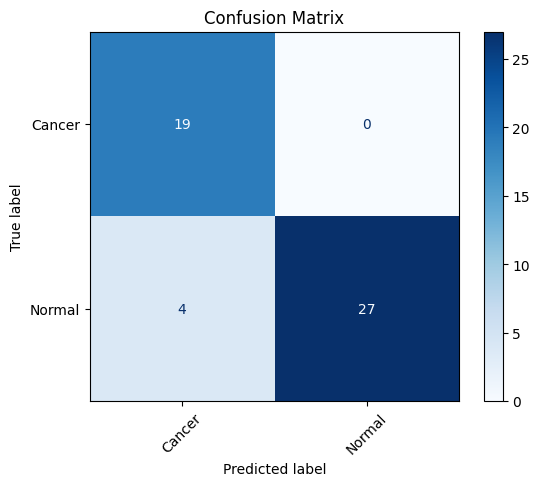

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Predict on the test set
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Step 2: Create the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Step 3: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

Tính F1-Score

In [7]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_true_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.83      1.00      0.90        19
           1       1.00      0.87      0.93        31

    accuracy                           0.92        50
   macro avg       0.91      0.94      0.92        50
weighted avg       0.93      0.92      0.92        50



**Tiếp tục áp dụng cho thuật toán: ResNet50, VGG16 (pre-trained)**